In [1]:
#本代碼所涉及的所有函數庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout,LSTM
from keras import backend
from keras.optimizers import SGD
from pandas import read_csv
import tensorflow.keras
import tensorflow as tf
import csv
import math
import random
import operator
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers.wrappers import Bidirectional
from keras.layers.normalization import BatchNormalization
from keras.layers.recurrent import GRU
%matplotlib inline
import os
import keras

# LSTM模型

In [2]:
def res(arr,x,y):
    zeroarray=np.zeros((1,y))
    #print(arr.shape)
    k=120-x+1
    if x<=120:
        for i in range(1,k):
            arr = np.vstack((arr,zeroarray))      #重設矩陣大小
    return arr

In [3]:
def classdatapredeal(dirdata1,dirdata2,string):
    
#     df = pd.read_csv(filedir1)#
#     #print(df)
#     attribute=df.columns#獲取屬性值
    attribute_set=[]
    count_arribute=0#基因選擇後的屬性個數
    #print(attribute)
    i=0
    for record in string: 
        if (record=='0'):
            count_arribute+=1
            attribute_set.append(i)
        i=1+i
    print(count_arribute)
    
    data1 = []
    label1 = []
    data2 = []
    label2 = []
    
    for i in os.listdir(dirdata1):
        npy_file = (dirdata1+i)
        x=np.load(npy_file)
        
        #x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        x=np.delete(x,attribute_set , axis=1)
        a,b=x.shape
        x=x.flatten('F')
        x.resize(120*b)
        x = np.array(x)
        
        
        data1.append(x)
        label1.append(0)
    print(len(data1))

    for i in os.listdir(dirdata2):
        npy_file = (dirdata2+i)
        x=np.load(npy_file)
        #x=np.delete(x, [30,31,32,33,34,35,36,37,40,41,42,43,46,47,48,49], axis=1)
        x=np.delete(x,attribute_set , axis=1)
        a,b=x.shape
        
        x=x.flatten('F')
        
        x.resize(120*b)
        x = np.array(x)
        
        data2.append(x)
        label2.append(1)
    print(len(data2))
    
    # print(data1)
    data1 = np.array(data1)
    label1 = np.array(label1)
    print(data1)
    data2 = np.array(data2)
    label2 = np.array(label2)
    
    
    print(label1.shape)
    #print(label1)
    
    data1 = preprocessing.scale(data1)
    data2 = preprocessing.scale(data2)
   
    #print(data1)
    print(data1.shape)
#     data1=medfilt(data1,3)
#     data1=gaussian_filter1d(data1,1.2)
#     data2=medfilt(data2,3)
#     data2=gaussian_filter1d(data2,1.2)
#     sc=MinMaxScaler(feature_range=(0,1))
#     data1=sc.fit_transform(data1)
#     data2=sc.fit_transform(data2)
    return  data1,label1,data2,label2

In [4]:
def datasplit(data,label):
    train_X,test_X, train_y, test_y = train_test_split(data,
                                                   label,
                                                   test_size = 0.4,
                                                   random_state = 77,shuffle=True)
    return train_X,test_X, train_y, test_y
    

In [5]:
def datasplit1(data,label):
    train_X,test_X, train_y, test_y = train_test_split(data,
                                                   label,
                                                   test_size = 0.5,
                                                   random_state = 42,shuffle=True)
    return train_X,test_X, train_y, test_y
    

In [6]:
#分類數據重組
def classdataReorganization(data1,label1,data2,label2,step):
    re_train_data = []
    re_train_label=[]
    
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    for i in range(0,data1.shape[0]):
        re_train_data.append(data1[i])
        re_train_label.append(label1[0])

    for i in range(0,data2.shape[0]):
        re_train_data.append(data2[i])
        re_train_label.append(label2[0])
    
    
    All_data = np.array(re_train_data)
    All_label = np.array(re_train_label)
    #print(All_data[0])
     # Label Onehot-encoding 
    All_label = np_utils.to_categorical(All_label)
    #print(All_data.shape[2])
    #print(All_label.shape)
    #print(All_label)
    return All_data,All_label

In [7]:
#分類數據重組
def classdataReorganization1(data1,label1,data2,label2,step):
    re_train_data = []
    re_train_label=[]
    #print(data1.shape)
    #print(label1)
    for i in range(len(data1)-step):
        re_train_data.append(data1[i:i+step])
        re_train_label.append(label1[i+step])

    for i in range(len(data2)-step):
        re_train_data.append(data2[i:i+step])
        re_train_label.append(label2[i+step])
    
    
    All_data = np.array(re_train_data)
    All_label = np.array(re_train_label)
    #print(All_data.shape)
     # Label Onehot-encoding 
    All_label = np_utils.to_categorical(All_label)
    return All_data,All_label

In [8]:
#分類數據重組
def classdataReorganization2(data1,label1,data2,label2,step):
    re_train_data = []
    re_train_label=[]
    
    data1 = np.array(data1)
    data2 = np.array(data2)
    #print(data1.shape)
    #print(label1)
    
    for i in range(0,data1.shape[0]):
        re_train_data.append(data1[i])
        re_train_label.append(label1[i])

    for i in range(0,data2.shape[0]):
        re_train_data.append(data2[i])
        re_train_label.append(label2[i])
    
    
    All_data = np.array(re_train_data)
    All_label = np.array(re_train_label)
    #print(All_data.shape)
    #print(All_data[0])
     # Label Onehot-encoding 
    All_label = np_utils.to_categorical(All_label)
    return All_data,All_label

In [9]:
def timeModel(X,step):
# 序列到序列堆叠式LSTM模型 
    #temp=X.shape[2]
    model=Sequential()
    model.add(LSTM(20,activation='relu',input_shape=(step,X.shape[2]),return_sequences=True))
    model.add(LSTM(20,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2,activation = 'sigmoid'))
    model.compile(loss='mse', optimizer="Adam", metrics=['accuracy'])
    model.summary()
    return model

In [10]:
def timeModel1(X,step):
# 序列到序列堆叠式LSTM模型 

    model=Sequential()
    model.add(LSTM(20,activation='relu',input_shape=(step,X.shape[2]),return_sequences=True))
    model.add(LSTM(20,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2,activation = 'sigmoid'))
    model.compile(loss='mse', optimizer="Adam", metrics=['accuracy'])
    model.summary()
    return model

# 基因演算法

In [40]:
class GA():
    def __init__(self, length, count):
        # 染色體長度
        self.length = length
        # 種群中的染色體數量
        self.count = count
        # 隨機生成初始種群
        self.population = self.gen_population(length, count)
        for i in range(len(self.population)):
            print("染色體：")
            print(i)
            print (self.population[i])
            print ('{0:b}'.format(self.population[i]))
#         #數據文路徑
#         self.filedir=filedir
    def evolve(self, retain_rate=0.2, random_select_rate=0.5, mutation_rate=0.01):
        """
        進化
        對當前一代種群依次進行選擇、交叉並生成新一代種群，然後對新一代種群進行變異
        """
        parents = self.selection(retain_rate, random_select_rate)
        self.crossover(parents)
        self.mutation(mutation_rate)
    def gen_chromosome(self, length):
        """
        隨機生成長度為length的染色體，每個基因的取值是0或1
        這裡用一個bit表示一個基因
        """
        chromosome = 0
        for i in range(length):
            # 這裡的或是整個二進位制比對的或|,比如10和1或下來的結果是11，  1001和101或的結果是1101，所以此處是個不斷隨機或出來的長度
            chromosome |= (1 << i) * random.randint(0, 1)  # 這裡每次左移， 隨機生成一個0或者1的數字，這樣不斷左移生成給定長度的二進位制染色體

        #print ('{0:b}'.format(chromosome))
        print("gen_chromosome pass")
        return chromosome
    def gen_population(self, length, count):
        """
        獲取初始種群（一個含有count個長度為length的染色體的列表）
        """
        po=[]
        j=0
        while j<=count:#保证染色体长度一致
            chromosome=0
            for i in range(length):
                    # 這裡的或是整個二進位制比對的或|,比如10和1或下來的結果是11，  1001和101或的結果是1101，所以此處是個不斷隨機或出來的長度
                    chromosome |= (1 << i) * random.randint(0, 1) 
                    #print('{0:b}'.format(chromosome))
            string='{0:b}'.format(chromosome)
            len_chromosome=len(string)
            if len_chromosome==length:
                po.append(chromosome)
                j+=1

            
        print("gen_population pass")
        return po
    def fitness(self, chromosome):
            string='{0:b}'.format(chromosome)
            print("所選擇的染色體：")
            print(string)
            #檔案路徑
            class_dirdata1='正手訓/'
            class_dirdata2='反手訓/'
            #特征篩選
            class_data1,class_label1,class_data2,class_label2=classdatapredeal(class_dirdata1,class_dirdata2,string)
            time_step=100#時間序列設置
            #數據和標籤設定
            class_All_data,class_All_label=classdataReorganization1(class_data1,class_label1,class_data2,class_label2,time_step)
            #訓練集測試集分割
            train_X,test_X, train_y, test_y=datasplit(class_All_data,class_All_label)
            
            print(train_X.shape)
            
            #print(train_X)
            
            #print(train_X[0][0])
            
            #print(train_X[0][0].shape)
            
            #模型訓練
            timemodel=timeModel1(train_X,time_step)
            history = timemodel.fit(train_X,train_y,epochs=50, validation_split=0.2,batch_size=100, verbose=1)
            score = timemodel.evaluate(test_X, test_y, verbose=0)
            
            print(score[1])
            print("fitness pass")
            return score[1]
    def selection(self, retain_rate, random_select_rate):
        """
        選擇
        先對適應度從大到小排序，選出存活的染色體
        再進行隨機選擇，選出適應度雖然小，但是倖存下來的個體
        """
        # 對適應度從大到小進行排序
        graded = [(self.fitness(chromosome), chromosome) for chromosome in self.population]  # 求出所有染色體的適應值列表
        
        print(graded)
        graded = [x[1] for x in sorted(graded, reverse=True)]  # 從小到大排序，形成新列表
        # 選出適應性強的染色體
        retain_length = int(len(graded) * retain_rate)  # 根據比例值  找到前。個適應性強的染色體 作為下一代的父母親
        parents = graded[:retain_length]
        print(parents)
        # 選出適應性不強，但是倖存的染色體        從後面中  隨機選取一比例   也放到父母親中
        for chromosome in graded[retain_length:]:
            if random.random() < random_select_rate:
                parents.append(chromosome)
        print(parents)
        print("selection pass")
        return parents
    def crossover(self, parents):
        """
        染色體的交叉、繁殖，生成新一代的種群
        """
        # 新出生的孩子，最終會被加入存活下來的父母之中，形成新一代的種群。
        children = []
        # 需要繁殖的孩子的量，差值，就是要交叉生成的目標數
        target_count = len(self.population) - len(parents)
        print("target_count:")
        print(target_count)
        # 開始根據需要的量進行繁殖
        while len(children) < target_count:
            male = random.randint(0, len(parents) - 1)
            female = random.randint(0, len(parents) - 1)
            if male != female:  # 父母親序號不能相同
                # 隨機選取交叉點
                cross_pos = random.randint(0, self.length)
                # 生成掩碼，方便位操作
                mask = 0
                for i in range(cross_pos):
                    mask |= (1 << i)
                male = parents[male]
                female = parents[female]
                # 孩子將獲得父親在交叉點前的基因和母親在交叉點後（包括交叉點）的基因
                child = ((male & mask) | (female & ~mask)) & ((1 << self.length) - 1)
                children.append(child)
        # 經過繁殖後，孩子和父母的數量與原始種群數量相等，在這裡可以更新種群。
        self.population = parents + children
        for i in range(len(self.population)):
            print("生成新一代的種群")
            print("染色體：")
            print(i)
            print (self.population[i])
            print ('{0:b}'.format(self.population[i]))
        print("crossover pass")
    def mutation(self, rate):
        """
        變異
        對種群中的所有個體，隨機改變某個個體中的某個基因
        """
        for i in range(len(self.population)):
            if random.random() < rate:
                j = random.randint(0, self.length - 1)
                self.population[i] ^= 1 << j
        for i in range(len(self.population)):
            print("變異後的種群")
            print("染色體：")
            print(i)
            print (self.population[i])
            print ('{0:b}'.format(self.population[i]))
        print("mutation pass")
    def decode(self, chromosome):
            """
            解碼染色體，將二進位制轉化為屬於[0, 9]的實數
            """
            print("decode pass")
            return chromosome * 9.0 / (2 ** self.length - 1)
            
    def result(self):
        """
        獲得當前代的最優值，這裡取的是函式取最大值時x的值。
        """
#         print (self.population[i])
#         print ('{0:b}'.format(self.population[i]))
        print("result pass")
        return '{0:b}'.format(self.population[0])

# 合併演算法

In [41]:
if __name__ == '__main__':
    # 染色體長度為76， 種群數量為20
    #26列
    count=0#计算当下迭代次数
    ga = GA(50,10)
    # 10次進化迭代
    for x in range(10):
        print("迭代次數：",x)
        print(x)
        ga.evolve()
   

gen_population pass
染色體：
0
1015345572933014
11100110110111001110010000001100101110110110010110
染色體：
1
597449706422239
10000111110110000010011001100001011011111111011111
染色體：
2
675163706037454
10011001100000111011001100110111010001010011001110
染色體：
3
763277591705581
10101101100011001001101001101101111111011111101101
染色體：
4
1045759325436402
11101101110001110011010001000111001111100111110010
染色體：
5
1019158526754399
11100111101110101101010101111101001111111001011111
染色體：
6
1079184628336305
11110101011000001101000000011010110100011010110001
染色體：
7
630243426653853
10001111010011001111111011100100010101011010011101
染色體：
8
734933558215968
10100111000110101100001101101010111100010100100000
染色體：
9
775221246910067
10110000010000111101000011000010110101111001110011
染色體：
10
1115926011338240
11111101101110110111000101100000000101111000000000
迭代次數： 0
0
所選擇的染色體：
11100110110111001110010000001100101110110110010110
23
240
200
[[842.31366 842.25574 842.2272  ...   0.        0.        0.     ]
 [786.4423  

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3240)
Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_234 (LSTM)              (None, 100, 20)           260880    
_________________________________________________________________
lstm_235 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_117 (Bat (None, 20)                80        
_________________________________________________________________
dense_117 (Dense)            (None, 2)                 42        
Total params: 264,282
Trainable params: 264,242
Non-trainable params: 40
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 0s 200ms/step - loss: 0.2936 - accuracy: 0.3826 - val_loss: 0.4322 - val_accuracy: 0.4138
Epoch 2/50
2/2 [==============================] - 0s 76ms/step - loss: 0.3026 - accura

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

(144, 100, 3480)
Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_236 (LSTM)              (None, 100, 20)           280080    
_________________________________________________________________
lstm_237 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_118 (Bat (None, 20)                80        
_________________________________________________________________
dense_118 (Dense)            (None, 2)                 42        
Total params: 283,482
Trainable params: 283,442
Non-trainable params: 40
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 0s 200ms/step - loss: 0.3261 - accuracy: 0.5478 - val_loss: 0.3761 - val_accuracy: 0.4828
Epoch 2/50
2/2 [==============================] - 0s 85ms/step - loss: 0.2593 - accura

KeyboardInterrupt: 

In [14]:
#geni_string=ga.result()
#11000110111000010000000011010000001001101011011110舊
#10000011101110101011100111101101001100101010001010新-1
#10010100101111110111111001010110001101111001000110
#1100111010101101100010011000011011
#1111101011001111101110111001111111 34變數 step150 epo50 迭代20
#1110100011000110011111011101111100
#1111000011111000001010010010111100
#1111000011111000001010010111001100
#11011001100000111100111100110100110000011100100011 new
#10001100001100100010000110000001011111110010010000
#11011100111010110111000000111101001111100100011010 10/06
#11100111010001000001100000001110001101101011010011 10/06-2
geni_string="11100111010001000001100000001110001101101011010011"
#geni_string="1111000011111000001010010111001100"
print (geni_string)

11100111010001000001100000001110001101101011010011


In [15]:
class_dirdata1='正手測/'
class_dirdata2='反手測/'
#特征篩選
class_data1,class_label1,class_data2,class_label2=classdatapredeal(class_dirdata1,class_dirdata2,geni_string)
time_step=100#時間序列設置


27
150
141
[[892.2679  889.3377  883.57776 ...   0.        0.        0.     ]
 [827.5576  833.3109  833.44904 ...   0.        0.        0.     ]
 [845.2422  845.22723 845.27435 ...   0.        0.        0.     ]
 ...
 [856.98865 856.96844 857.0011  ...   0.        0.        0.     ]
 [886.5086  886.5275  886.45917 ...   0.        0.        0.     ]
 [880.42114 880.563   880.5173  ...   0.        0.        0.     ]]
(150,)
(150, 2760)


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

In [16]:
class_data1.shape

(150, 2760)

In [17]:
class_label2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
#數據和標籤設定
class_All_data,class_All_label=classdataReorganization1(class_data1,class_label1,class_data2,class_label2,time_step)
#訓練集測試集分割
train_X,test_X, train_y, test_y=datasplit1(class_All_data,class_All_label)


In [19]:
test_y[:3]

array([[1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [28]:
#模型訓練
timemodel=timeModel1(train_X,time_step)
history = timemodel.fit(train_X,train_y,epochs=50, validation_split=0.2,batch_size=50, verbose=1)

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_232 (LSTM)              (None, 100, 20)           222480    
_________________________________________________________________
lstm_233 (LSTM)              (None, 20)                3280      
_________________________________________________________________
batch_normalization_116 (Bat (None, 20)                80        
_________________________________________________________________
dense_116 (Dense)            (None, 2)                 42        
Total params: 225,882
Trainable params: 225,842
Non-trainable params: 40
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 0s 248ms/step - loss: 0.2489 - accuracy: 0.5833 - val_loss: 0.6207 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 0.2338 - accuracy: 0.6944 - val_

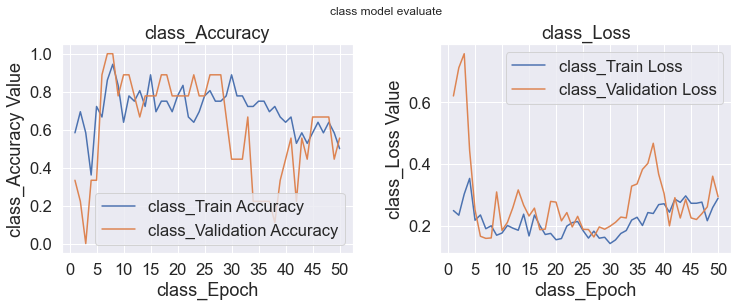

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('class model evaluate', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

class_epoch_list = list(range(1,51))
ax1.plot(class_epoch_list, history.history['accuracy'], label='class_Train Accuracy')
ax1.plot(class_epoch_list, history.history['val_accuracy'], label='class_Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('class_Accuracy Value')
ax1.set_xlabel('class_Epoch')
ax1.set_title('class_Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(class_epoch_list, history.history['loss'], label='class_Train Loss')
ax2.plot(class_epoch_list, history.history['val_loss'], label='class_Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('class_Loss Value')
ax2.set_xlabel('class_Epoch')
ax2.set_title('class_Loss')
l2 = ax2.legend(loc="best")

In [30]:
#對分類區中的test進行預測
time_pre=timemodel.predict(test_X,verbose=2)

2/2 - 0s


In [31]:
test_y[:3]

array([[1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [32]:
time_pre[:3]

array([[0.01146933, 0.9504182 ],
       [0.5923906 , 0.4731993 ],
       [0.91238815, 0.05144984]], dtype=float32)

In [33]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_y, time_pre))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.543


In [34]:
Y_pred = np.argmax(time_pre,axis=1)
Y_test = np.argmax(test_y,axis=1)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[[21  9]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.50      0.56      0.53        16

    accuracy                           0.65        46
   macro avg       0.62      0.63      0.63        46
weighted avg       0.66      0.65      0.66        46



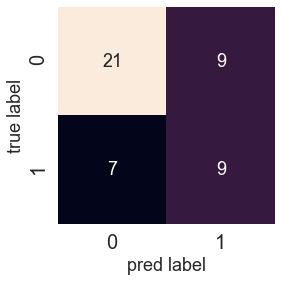

In [36]:
mat = confusion_matrix(Y_test,Y_pred)
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('pred label')
plt.ylabel('true label')

t = ['0','1']
print(mat)
print(classification_report(Y_test,Y_pred,target_names=t))

Text(0.5, 1.0, 'Predicted label (first 100)')

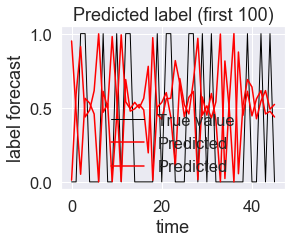

In [37]:
plt.figure(figsize=(4,3))


# plt.subplot(3,1,1)
plt.plot(Y_test[:150], color = 'black', linewidth=1, label = 'True value')
plt.plot(time_pre[:150], color = 'red', label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("label forecast")
plt.xlabel("time")
plt.title("Predicted label (first 100)")

In [122]:
#timemodel.save('t-lstm.h5')

In [123]:
#讀取model
modello = keras.models.load_model('t-lstm.h5')

In [125]:
geni_string="1111000011111000001010010111001100"
class_dirdata1='forehand_other/'
class_dirdata2='backhand_other/'
#特征篩選
class_data1,class_label1,class_data2,class_label2=classdatapredeal(class_dirdata1,class_dirdata2,geni_string)
time_step=150#時間序列設置

17
217
174
[[907.01166 906.9641  904.2041  ...   0.        0.        0.     ]
 [927.5018  930.56915 933.6062  ...   0.        0.        0.     ]
 [892.2679  889.3377  883.57776 ...   0.        0.        0.     ]
 ...
 [921.6772  921.78296 924.62537 ...   0.        0.        0.     ]
 [921.7637  921.7229  915.86456 ...   0.        0.        0.     ]
 [957.08356 957.1126  957.07367 ...   0.        0.        0.     ]]
(217,)
(217, 2040)


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical

In [126]:
class_data1.shape

(217, 2040)

In [127]:
class_data1

array([[0.17156641, 0.18031666, 0.17094249, ..., 0.        , 0.        ,
        0.        ],
       [0.33240753, 0.36529893, 0.40148962, ..., 0.        , 0.        ,
        0.        ],
       [0.05583227, 0.04218635, 0.00920764, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2866863 , 0.29644543, 0.3310693 , ..., 0.        , 0.        ,
        0.        ],
       [0.2873652 , 0.29597476, 0.26237425, ..., 0.        , 0.        ,
        0.        ],
       [0.56461555, 0.57330817, 0.5855022 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [128]:
class_label2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [129]:
#數據和標籤設定
test_All_data,test_All_label=classdataReorganization1(class_data1,class_label1,class_data2,class_label2,time_step)

In [130]:
#對分類區中的test進行預測
time_pre=modello.predict(test_All_data,verbose=2)

3/3 - 0s


In [131]:
test_All_label[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [132]:
time_pre[:3]

array([[0.9805745 , 0.02194503],
       [0.97498727, 0.06682932],
       [0.98053277, 0.05037218]], dtype=float32)

In [133]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_All_label, time_pre))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.340


In [134]:
Y_pred = np.argmax(time_pre,axis=1)
Y_test = np.argmax(test_All_label,axis=1)

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[[52 15]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.87        67
           1       0.62      1.00      0.76        24

    accuracy                           0.84        91
   macro avg       0.81      0.89      0.82        91
weighted avg       0.90      0.84      0.84        91



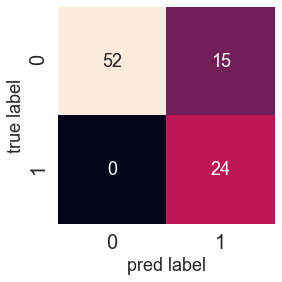

In [136]:
mat = confusion_matrix(Y_test,Y_pred)
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('pred label')
plt.ylabel('true label')

t = ['0','1']
print(mat)
print(classification_report(Y_test,Y_pred,target_names=t))

Text(0.5, 1.0, 'Predicted label (first 100)')

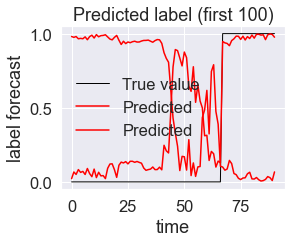

In [137]:
plt.figure(figsize=(4,3))

# plt.subplot(3,1,1)
plt.plot(Y_test[:150], color = 'black', linewidth=1, label = 'True value')
plt.plot(time_pre[:150], color = 'red', label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("label forecast")
plt.xlabel("time")
plt.title("Predicted label (first 100)")